# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import missingno
from sklearn.model_selection import train_test_split
from scipy import stats

# Read_Data

In [2]:
data=pd.read_csv('50_StartUp_for_train.csv')
df=copy.deepcopy(data)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Check and drop Duplicated

In [3]:
df.duplicated().sum()

0

In [4]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# Get Information of Data

In [5]:
df.shape

(50, 5)

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.describe(include=['object'])

,State
count,50
unique,3
top,New York
freq,17


In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

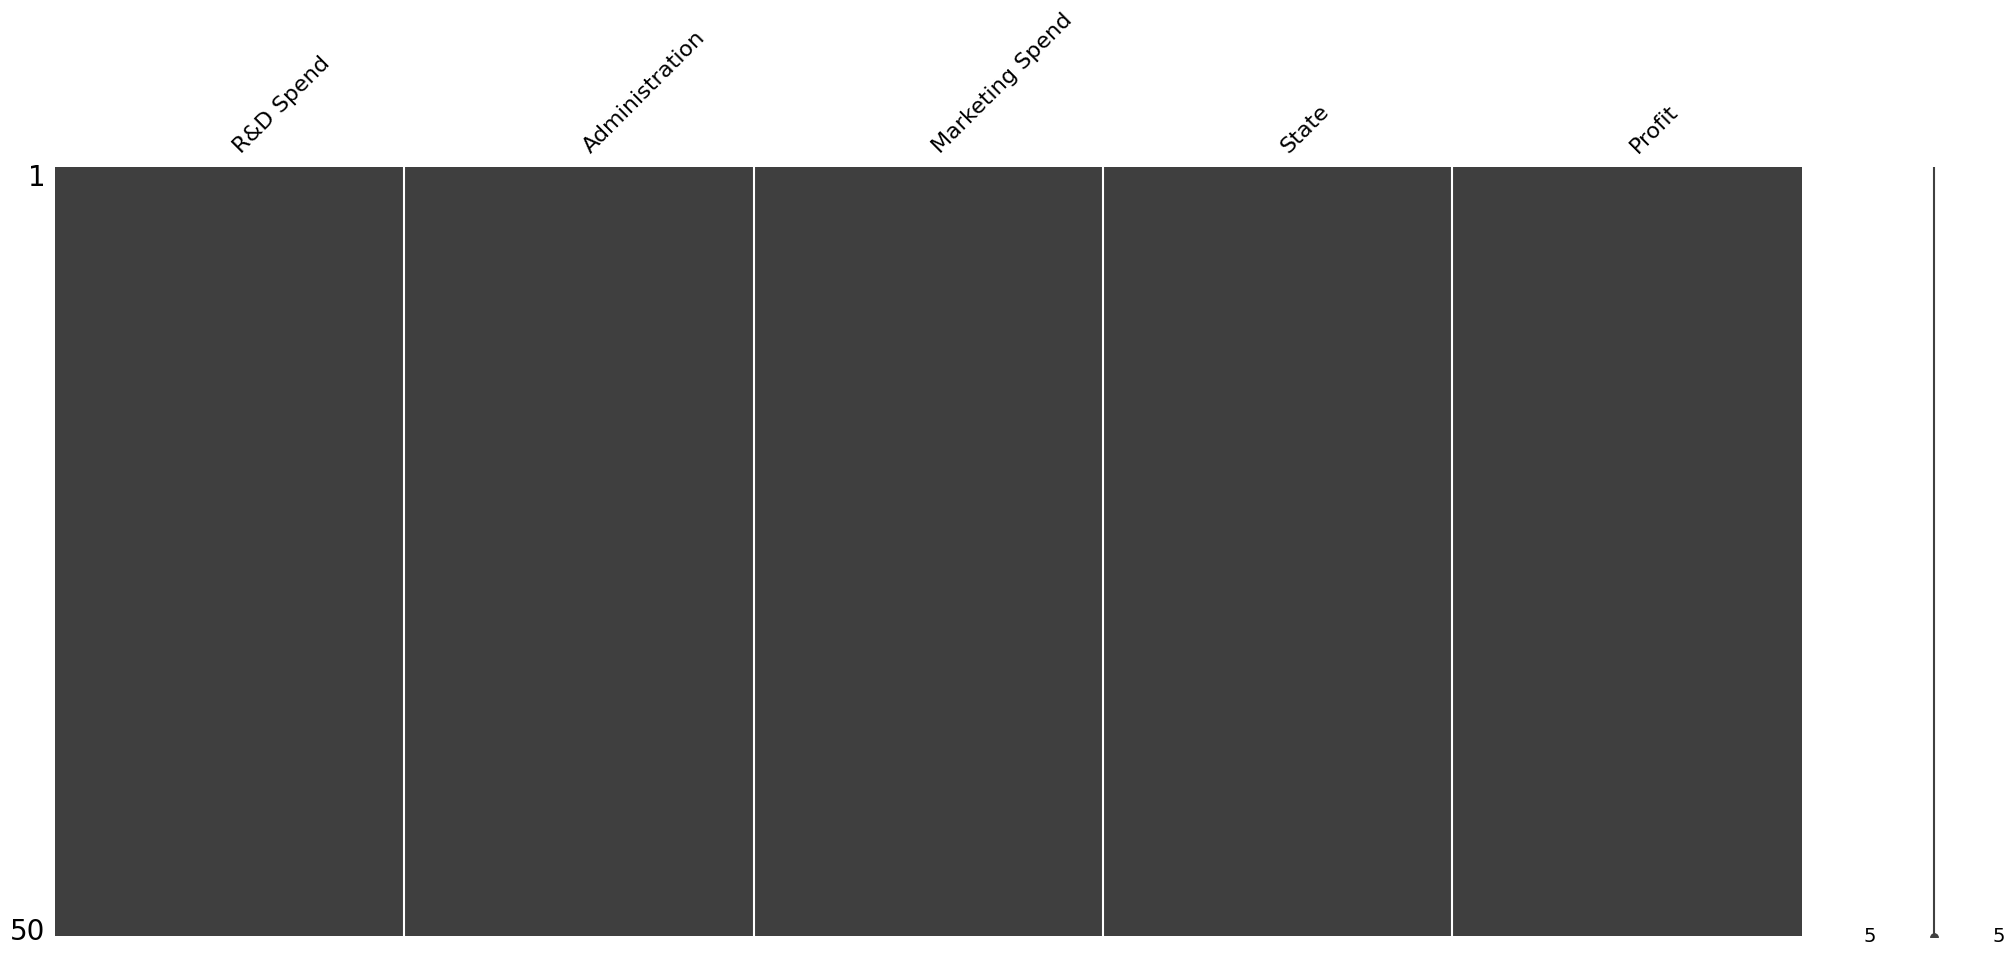

In [9]:
missingno.matrix(df)
# missingno.bar(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.columns.tolist()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

# Drop columns that aren't useful

In [12]:
# df.drop(['',''],axis=1,inplace=True)
# df.head()

# Removing Rows with Missing Values

In [13]:
# df.dropna(subset=['Glucose','Diastolic_BP'], inplace=True)
# df.isnull().sum()

# Filling Missing Values

## Filling Missing Values for all DataFrame

In [14]:
# Fill with a constant value
# df = df.fillna(0)

# Fill with the mean value
# df = df.fillna(df.mean())

# Fill with the median value
# df = df.fillna(df.median())

# Fill with the most frequent value (mode)
# df = df.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Interpolation (linear)
# df = df.interpolate()

## Identify columns with missing values

In [15]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


## Filling Missing Values for each column

In [16]:
# Fill with a constant value
# df[['Serum_Insulin']] = df[['Serum_Insulin']].fillna(0)

# Fill with the mean value
# df[['Marketing Spend']] = df[['Marketing Spend']].fillna(df[['Marketing Spend']].mean())

# Fill with the median value
# df[['Serum_Insulin']] = df[['Serum_Insulin']].fillna(df[['Marketing Spend']].median())

# Fill with the most frequent value (mode)
# df[['Marketing Spend']] = df[['Marketing Spend']].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Interpolation (linear)
# df[['Marketing Spend']] = df[['Marketing Spend']].interpolate()

# df.head()

## Check the Missing Values

In [17]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Check balance for Output (Classification_train)

In [18]:
# y_out = 'Profit'
# df[y_out].value_counts()

In [19]:
# # engine-location as variable
# engine_loc_counts = df[y_out].value_counts().to_frame()
# engine_loc_counts.rename(columns={y_out: 'value_counts'}, inplace=True)
# engine_loc_counts.index.name = 'name'
# engine_loc_counts.head(10)

In [20]:
# # Seaborn count plot with customizations
# plt.figure(figsize=(8, 6))  # Set the figure size
# sns.countplot(data=df, x=y_out, hue=y_out, palette='magma', order=df[y_out].value_counts().index, edgecolor='black', legend=False)
# plt.xlabel(y_out, fontsize=14)  # Set x-axis label with font size
# plt.ylabel('Count', fontsize=14)  # Set y-axis label with font size
# plt.title('Count Plot', fontsize=16)  # Set title with font size
# plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.3)  # Add grid lines with custom style
# plt.xticks(fontsize=12)  # Set font size for x-axis ticks
# plt.yticks(fontsize=12)  # Set font size for y-axis ticks
# plt.legend(set(df[y_out]), loc='upper right')  # Add legend
# plt.show()

# Correlation Coefficient

In [21]:
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
# for param in numeric_columns:
#     pearson_coef, p_value = stats.pearsonr(df[param], df['price'])
#     print(param)
#     print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value,'\n')

# Groupby and pivot

In [22]:
# df_group = df[['','','']]

# # grouping results
# df_group_one = df_group.groupby(['',''],as_index=False).mean()
# df_group_one

In [23]:
# grouped_pivot = df_group_one.pivot(index='',columns='')
# grouped_pivot

In [24]:
# # pcolor
# fig, ax = plt.subplots()
# im = ax.pcolor(grouped_pivot, cmap='RdBu')

# #label names
# row_labels = grouped_pivot.columns.levels[1]
# col_labels = grouped_pivot.index

# #move ticks and labels to the center
# ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
# ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# #insert labels
# ax.set_xticklabels(row_labels, minor=False)
# ax.set_yticklabels(col_labels, minor=False)

# fig.colorbar(im)

# Visualization

## Heatmap

In [25]:
# without str column in dataset
# correlations=df.corr()
# drop str column to get correlations
correlations=df.drop(['State'],axis=1).corr()
correlations

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


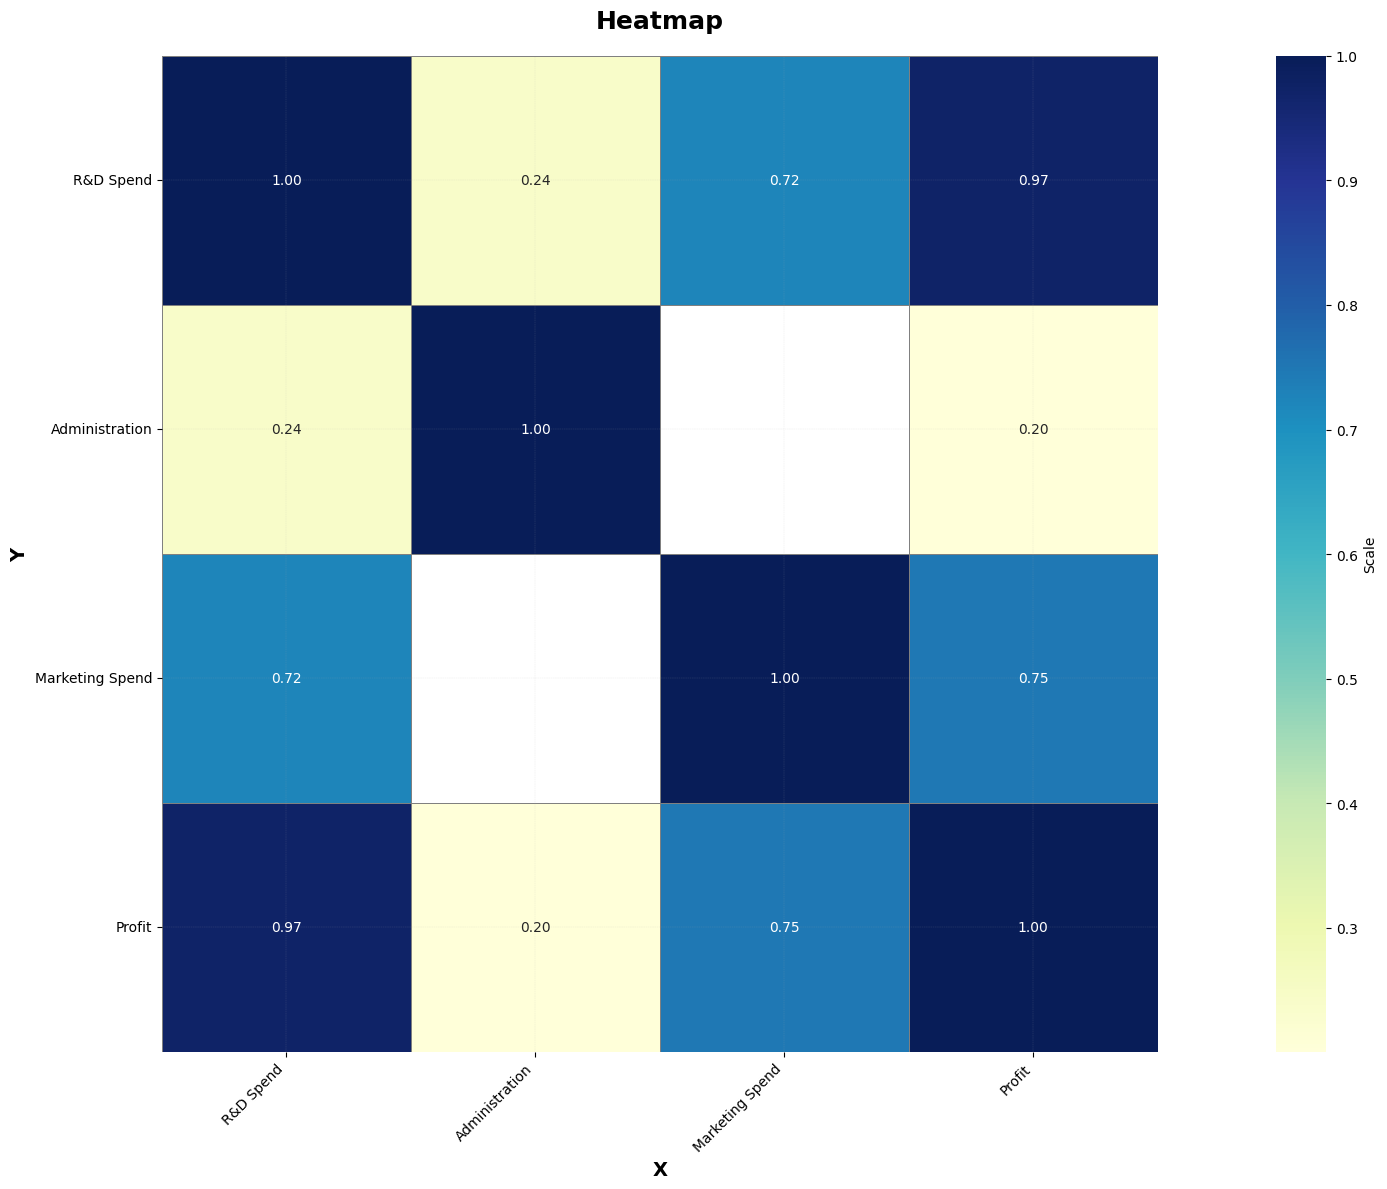

In [26]:
# Create a figure and axis
plt.figure(figsize=(24, 12))

# Create a heatmap with customization
heatmap = sns.heatmap(
    data=correlations,
    annot=True,              # Annotate cells with the data value
    fmt=".2f",               # Format the annotations to 2 decimal places
    cmap="YlGnBu",           # Colormap
    cbar=True,               # Show color bar
    cbar_kws={'label': 'Scale'},  # Color bar customization
    linewidths=0.5,          # Line width between cells
    linecolor='gray',        # Line color between cells
    square=True,             # Force square cells
    mask=correlations<0.1,               # Do not mask any data
    annot_kws={"size": 10},  # Annotation font size
    xticklabels=True,        # Show x-axis labels
    yticklabels=True,        # Show y-axis labels
    robust=True              # Robust colormap limits
)

# Customize the plot
plt.title('Heatmap', fontsize=18, weight='bold', pad=20)
plt.xlabel('X', fontsize=14, weight='bold')
plt.ylabel('Y', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better fit
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.3)
# Display the heatmap
plt.show()

## Scatter plot

In [27]:
df.columns.tolist()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

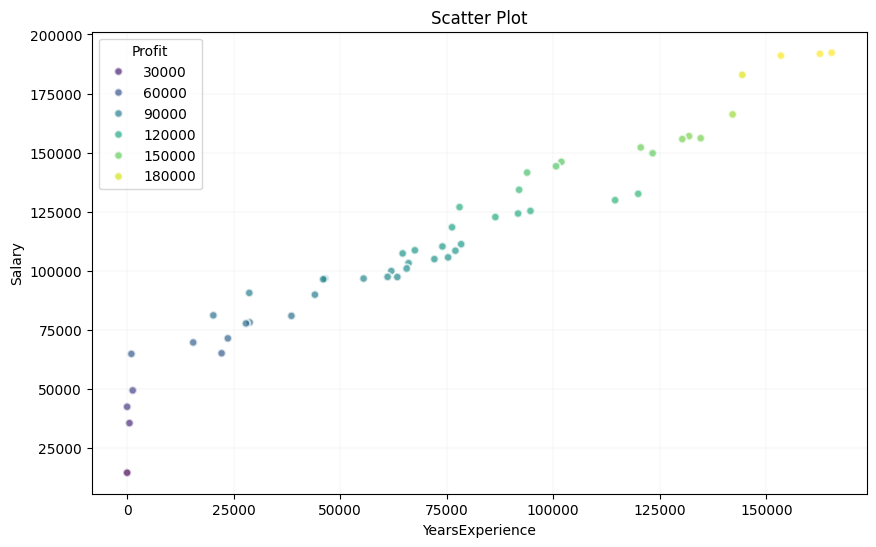

In [28]:
# Create Seaborn scatter plot with customization
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
                        data=df, 
                        x='R&D Spend', 
                        y='Profit',
                        hue = 'Profit',
                        palette='viridis', 
                        sizes=(20, 500), 
                        alpha=0.7, 
                        edgecolor='w', 
                        linewidth=1.5
)
# Customize plot
plt.title('Scatter Plot')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.grid(True, linewidth=0.3, alpha=0.3)
# Add legend

# Display plot
plt.show()

## Histogram

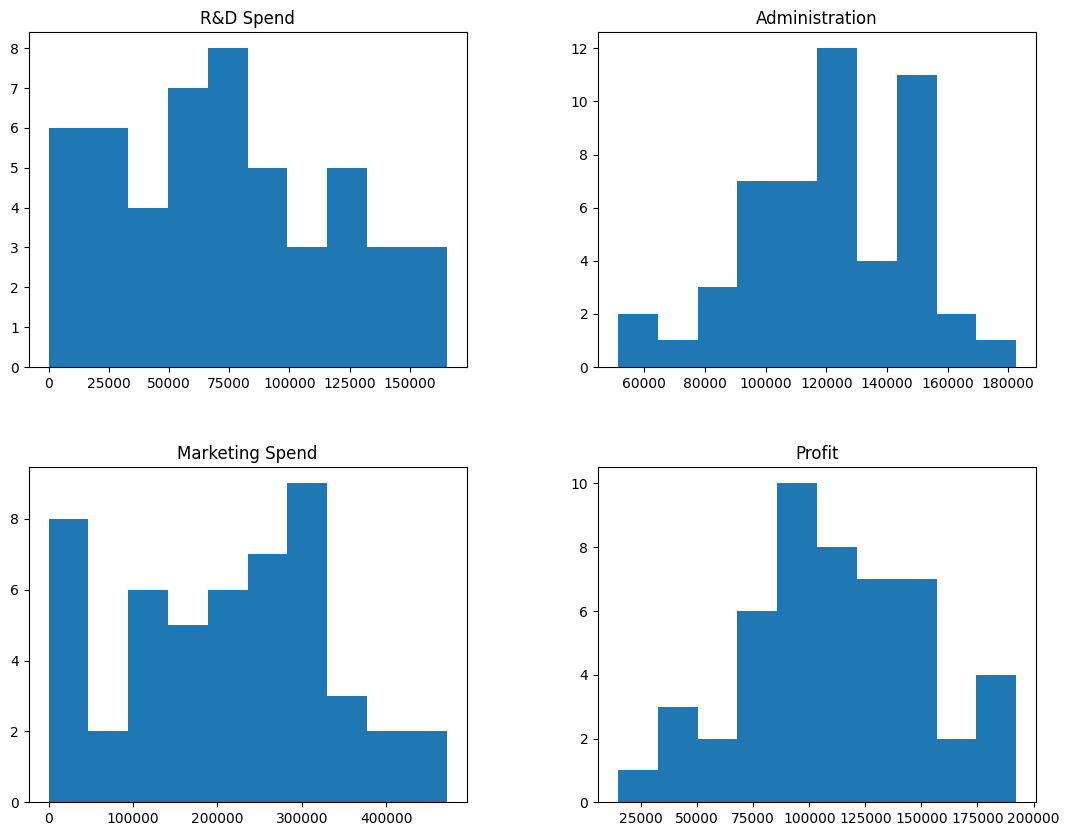

In [29]:
df.hist(figsize=(13,10),grid=False,)
plt.show()

# # or
# fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (8, 6))
# colors = ["#e24a33", "#348abd", "#988ed5", "#777777"] # whatever the colors may be but it should be different for each histogram.
# for index, column in enumerate(correlations.columns):
#     ax = axes.flatten()[index]
#     ax.hist(df[column], color = colors[index], label = column)
#     ax.legend(loc = "best")
# plt.suptitle("Desired Histograms", size = 20)
# plt.show()

## show DataFrame

In [30]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Encoding

## If it have more than two different words

### get_dummies

In [31]:
dummies = []
cols = ['State']
for col in cols:
    dummies.append(pd.get_dummies(df[col], drop_first=True, dtype=float))
titanic_dummies = pd.concat(dummies, axis=1)
df = pd.concat((df, titanic_dummies), axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,1.0,0.0


In [32]:
df=df.drop(cols,axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


### *------------------------------------------------------------------------------------------------------------------*

### LabelEncoder

In [33]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['State'] = le.fit_transform(df['State'])
# df.head()

### If only had two different words

In [34]:
# df[''].unique()

In [35]:
# df['']=[ 1 if i==''  else 0  for i in df['']]

In [36]:
# df[''].unique()

In [37]:
# df.head()

# get X , Y

In [38]:
x=df.drop('Profit',axis=1)
y=df['Profit']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3, random_state=42)

In [40]:
print(x_train.shape)
print(x_test.shape)

(35, 5)
(15, 5)


In [41]:
print(y_train.shape)
print(y_test.shape)

(35,)
(15,)


# Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Train LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(x_test)

# Evaluate model

Mean Absolute Error (MAE) = 7395.4335
Mean Squared Error (MSE) = 84826955.0353
Root Mean Squared Error (RMSE) = 9210.1550
R² Score = 0.9397


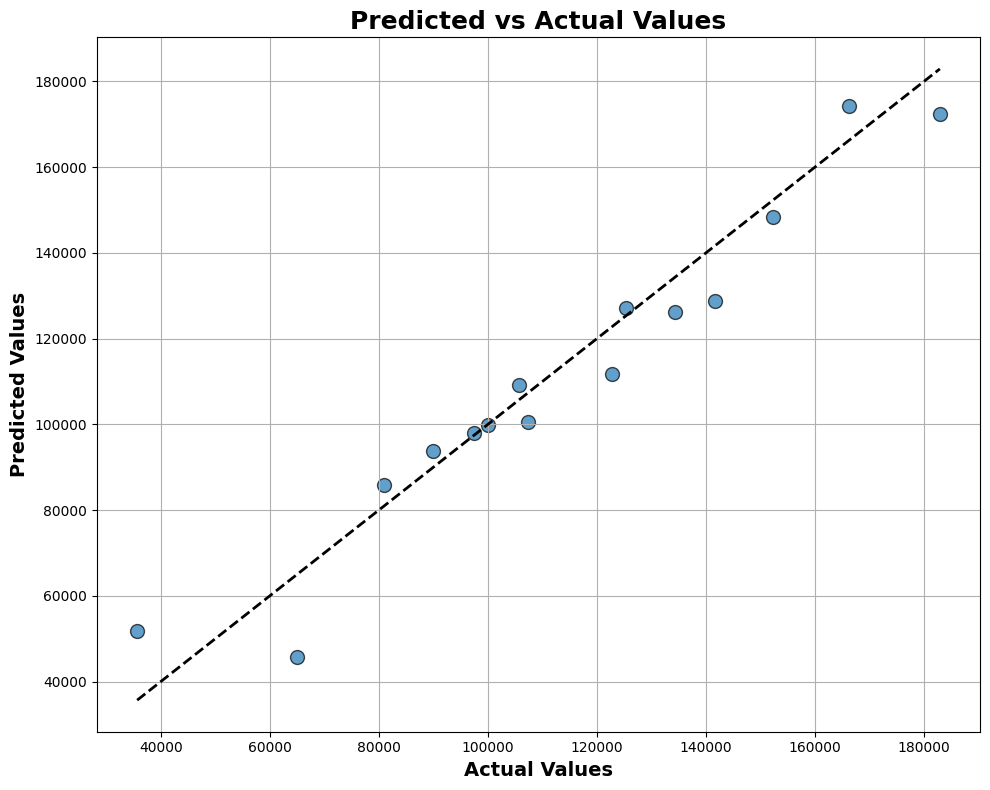

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_regression(y_test, y_pred):
    """
    Evaluates a regression model and plots the predicted vs. actual values.

    Parameters:
    - y_test: array-like, shape (n_samples,)
        True labels of the test set.
    - y_pred: array-like, shape (n_samples,)
        Predicted labels by the model.

    This function calculates several evaluation metrics including MAE, MSE,
    RMSE, and R² score. It also plots the predicted vs. actual values.
    """

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f'Mean Absolute Error (MAE) = {mae:.4f}')
    print(f'Mean Squared Error (MSE) = {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE) = {rmse:.4f}')
    print(f'R² Score = {r2:.4f}')

    # Plot predicted vs actual values
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, s=100)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values', fontsize=14, weight='bold')
    plt.ylabel('Predicted Values', fontsize=14, weight='bold')
    plt.title('Predicted vs Actual Values', fontsize=18, weight='bold')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

evaluate_model_regression(y_test, y_pred)

## R2_score

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9397108063355788

## MSE

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

84826955.03533393

## RMSE

In [47]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

9210.154995185148

## MAE

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

7395.4335315239

# deployment

In [49]:
# y= mx +b >>>>>> m,b
m=model.coef_
b=model.intercept_
print(m,b)

[37742.0772359  -2323.64523934  3236.02541427   217.42980741
  -573.39775573] 111235.21314285714
